# Who is Tweeting for Trump?

Recently, people have noticed differences in the tone of Trump's tweets that come from an Android, as opposed to iPhone: see, for example, [here](http://www.cnet.com/news/trumps-tweets-android-for-nasty-iphone-for-nice/). These analyses, however, have only looked at a few tweets side by side to make their point. A much more thorough analysis is needed to determine whether there is, in fact, anything to this theory.

For this project, I have downloaded approximately 3200 of Trump's most recent tweets, which is the maximum allowed through the Twitter API. I compared usage patterns of iPhone and Android over time, but found no smoking gun there. I then ran a sentiment analyser for the Tweets, and found that those sent from Android are far more negative than those sent from iPhone. While this does not prove that (for example) Trump's staff operates his iPhone, it is an interesting finding and worth further study.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy.stats import ttest_ind

%matplotlib inline
plt.style.use('ggplot')

## Loading and cleaning data

In [2]:
df = pd.read_csv('trump_tweets_source.csv', parse_dates = [1])
df.drop(["id"], axis=1, inplace=True)
df.head()

,text,created_at,favorite_count,retweet_count,source
0,I see where Mayor Stephanie Rawlings-Blake of ...,2016-08-07 13:49:29,20612,6935,Twitter for Android
1,"Thank you Windham, New Hampshire! #TrumpPence1...",2016-08-07 02:19:37,16438,4966,Twitter for iPhone
2,.@Larry_Kudlow - 'Donald Trump Is the middle-c...,2016-08-07 02:03:39,16770,6753,Twitter for iPhone
3,I am not just running against Crooked Hillary ...,2016-08-07 01:53:45,62349,20504,Twitter for Android
4,#CrookedHillary is not fit to be our next pres...,2016-08-06 20:04:08,21655,7284,Twitter for iPhone


In [3]:
df["source"].value_counts()

Twitter for Android    1649
Twitter for iPhone     1312
Twitter Web Client      232
Instagram                 3
Twitter for iPad          2
Mobile Web (M5)           1
Name: source, dtype: int64

Most tweets are coming from Twitter for Android or iPhone (with somewhat more coming from Android). A small but important minority come from the web client; a small handful are coming from Instagram, iPad, and the mobile web browser.

## Does the source for Trump Tweets change over time?

In [4]:
df2 = df.set_index('created_at')

In [5]:
df2["hour"] = df2.index.hour
hourlytweets = df2.groupby("hour")

In [6]:
# Making a dictionary that contains the number of tweets from iPhone and Android by hour.

iphone = {}
android = {}
for hr, item in hourlytweets:
    iphone[hr] = len(item[item.source == "Twitter for iPhone"])
    android[hr] = len(item[item.source == "Twitter for Android"])

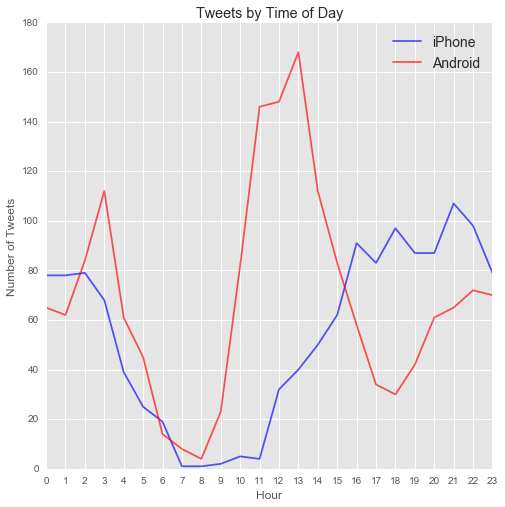

In [7]:
plt.figure(figsize=(8,8))
line1, = plt.plot(range(len(iphone)), iphone.values(), color = 'b', alpha = .66, label = "iPhone")

line2, = plt.plot(range(len(android)), android.values(), color='r', alpha = .66, label = "Android")
plt.xticks(range(len(android)), android.keys())
plt.legend(handles=[line1, line2], loc=1, fontsize=14)
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.title('Tweets by Time of Day')
plt.xlim(0,23)
plt.show()

It is intersting that Tweets seem to come from Android during business hours! It's difficult to determine what to make of this fact, however

In [8]:
df2["month"] = df2.index.month
monthlytweets = df2.groupby("month")

In [9]:
# Dictionaries for iPhone and Android to count number of tweets by month.

month_iphone = {}
month_android = {}
for month, item in monthlytweets:
    month_iphone[month] = len(item[item.source == "Twitter for iPhone"])
    month_android[month] = len(item[item.source == "Twitter for Android"])

In [10]:
#This is hacky, but we want to move the december data to the front of the chronology.
month_iphone[0] = month_iphone.pop(12)
month_android[0] = month_android.pop(12)

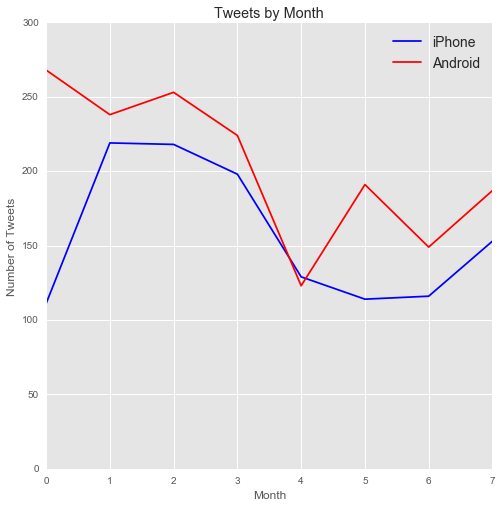

In [11]:
plt.figure(figsize=(8,8))
line1, = plt.plot(range(len(month_iphone)), month_iphone.values(), color = 'b', label = "iPhone")

line2, = plt.plot(range(len(month_android)), month_android.values(), color='r', label = "Android")
plt.xticks(range(len(month_android)), month_android.keys())
plt.legend(handles=[line1, line2], loc=1, fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Tweets by Month')
# Leaving August off because it's an outlier for now
plt.xlim(0,7)
plt.show()

In December, the Android was used far more often than the iPhone. Other variation is more difficult to summarize.

In [12]:
df2["week"] = df2.index.weekofyear
weeklytweets = df2.groupby("week")

In [13]:
# Creating dictionaries to count tweets by week

week_iphone = {}
week_android = {}
for week, item in weeklytweets:
    week_iphone[week] = len(item[item.source == "Twitter for iPhone"])
    week_android[week] = len(item[item.source == "Twitter for Android"])

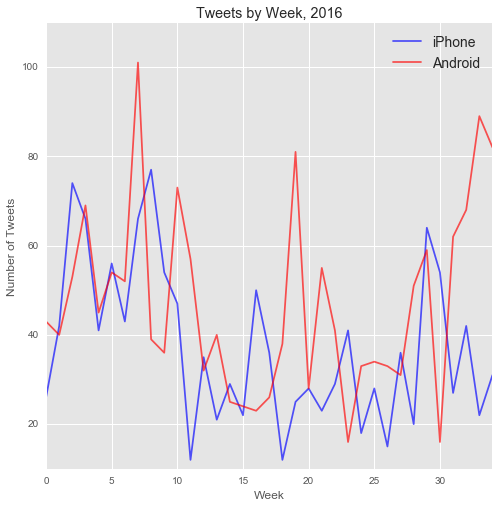

In [14]:
plt.figure(figsize=(8,8))
line1, = plt.plot(range(len(week_iphone)), week_iphone.values(), color = 'b', alpha = .66, label = "iPhone")

line2, = plt.plot(range(len(week_android)), week_android.values(), color='r', alpha = .66, label = "Android")
plt.legend(handles=[line1, line2], loc=1, fontsize=14)
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Tweets by Week, 2016')
# Leaving off last year's tweets because it's an outlier for now
plt.xlim(0,34)
plt.show()

Looking at usage in a more-fine grained manner, we can see that Android usage has spiked up recently.

Tracking usage by device over time is interesting, but there's no obvious conclusion to be drawn about usage patterns here

## Sentiment Analysis of Tweets by Source

In [15]:
sid = SentimentIntensityAnalyzer()

df["sentiment"] = df.text.apply(lambda tweet: sid.polarity_scores(tweet))

In [16]:
df["comp"] = df.sentiment.apply(lambda sent: sent["compound"])
df.head()

,text,created_at,favorite_count,retweet_count,source,sentiment,comp
0,I see where Mayor Stephanie Rawlings-Blake of ...,2016-08-07 13:49:29,20612,6935,Twitter for Android,"{u'neg': 0.056, u'neu': 0.844, u'pos': 0.1, u'...",0.2714
1,"Thank you Windham, New Hampshire! #TrumpPence1...",2016-08-07 02:19:37,16438,4966,Twitter for iPhone,"{u'neg': 0.0, u'neu': 0.715, u'pos': 0.285, u'...",0.4199
2,.@Larry_Kudlow - 'Donald Trump Is the middle-c...,2016-08-07 02:03:39,16770,6753,Twitter for iPhone,"{u'neg': 0.0, u'neu': 0.755, u'pos': 0.245, u'...",0.3818
3,I am not just running against Crooked Hillary ...,2016-08-07 01:53:45,62349,20504,Twitter for Android,"{u'neg': 0.151, u'neu': 0.65, u'pos': 0.198, u...",0.5104
4,#CrookedHillary is not fit to be our next pres...,2016-08-06 20:04:08,21655,7284,Twitter for iPhone,"{u'neg': 0.194, u'neu': 0.806, u'pos': 0.0, u'...",-0.3404


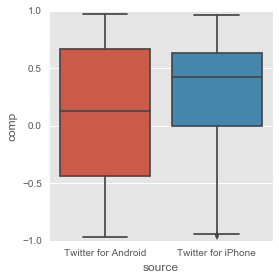

In [17]:
sns.factorplot(x = 'source',
    y = 'comp',
    data = df[(df.source == "Twitter for Android") | (df.source == "Twitter for iPhone")],
    kind = 'box')

We can see in the chart above that sentiments expressed from the iPhone are far more positive than those expressed from Android! While both devices may be used to post things that are positive or things that are negative, on average, the iPhone posts are more positive. 

How significant is this finding?

In [18]:
cat1 = df[df['source']=='Twitter for iPhone']
cat2 = df[df['source']=='Twitter for Android']

ttest_ind(cat1['comp'], cat2['comp'])


Ttest_indResult(statistic=6.6184713628428327, pvalue=4.2924413617414892e-11)

This result is highly significant! There seems to be a very real difference in tone between these devices.

## Conclusion

By running a sentiment analysis on Trump's tweets, we can determine that there is a significant difference in tone between those tweets that come from Android, and those that come from iPhone. 

The next step might be to try to determine authorship of tweets by studying word usage more closely. We may be able to successfully classify tweets in such a way that we can determine whether or not it is Trump who is writing all of these tweets.